In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data 
df=pd.read_csv("train.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
#data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df['Postal Code'].isnull().sum()

11

In [6]:
df['Postal Code'].fillna(5201,inplace=True)
df['Postal Code']=df['Postal Code'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55217.118776,230.769059
std,2829.160653,32067.100015,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
df.duplicated().sum()

0

In [9]:
df.corr()

C:\Users\Tanmo\AppData\Local\Temp\ipykernel_19928\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Row ID,Postal Code,Sales
Row ID,1.000000,0.011518,0.001151
Postal Code,0.011518,1.000000,-0.025594
Sales,0.001151,-0.025594,1.000000


C:\Users\Tanmo\AppData\Local\Temp\ipykernel_19928\3287262945.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<AxesSubplot: >

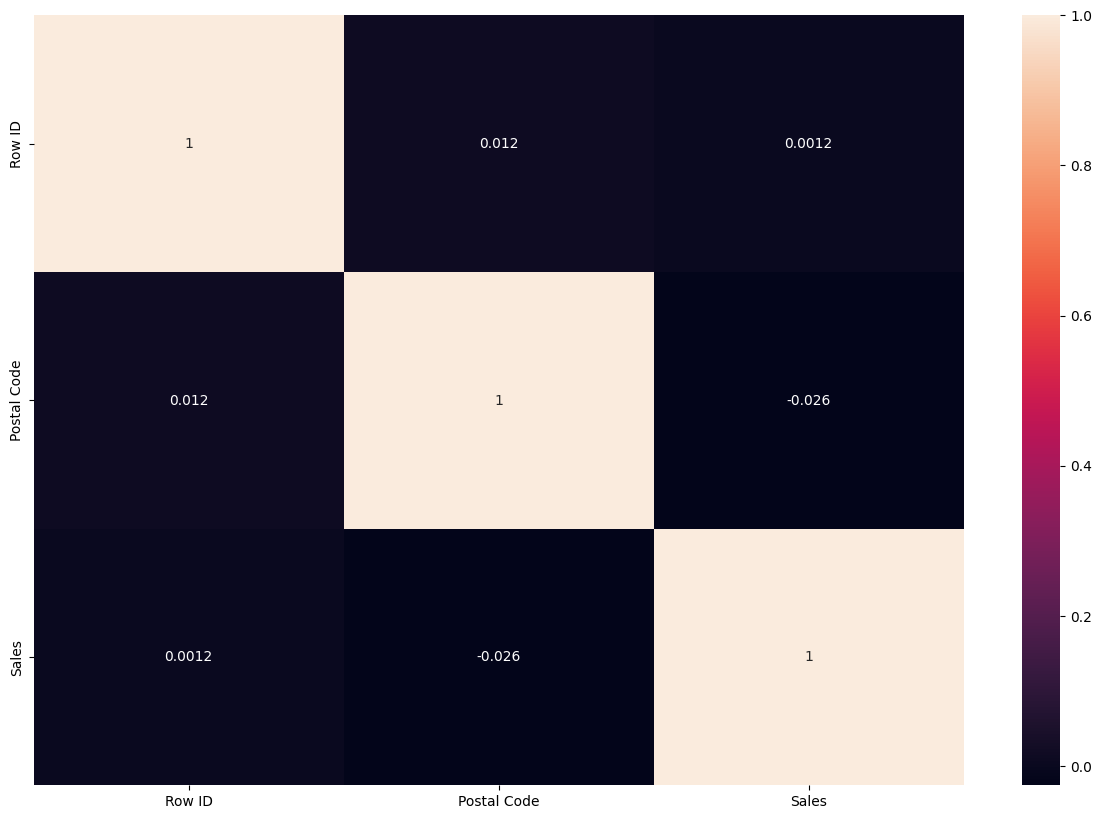

In [55]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)


# Analysis by Each Segment

In [10]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [11]:
a=df['Segment'].value_counts().reset_index().rename(columns={'index':'Customer Type','Segment':'Total Customers'})
a

,Customer Type,Total Customers
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


<function matplotlib.pyplot.show(close=None, block=None)>

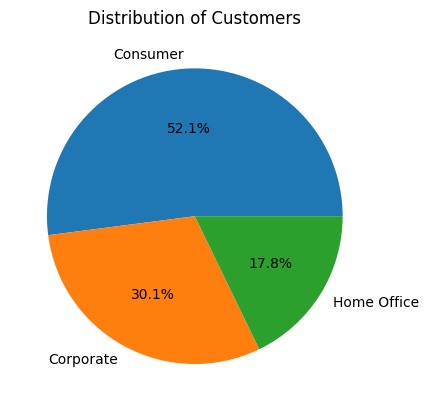

In [12]:
plt.pie(a['Total Customers'],labels=a['Customer Type'],autopct='%1.1f%%')
plt.title('Distribution of Customers')
plt.show

In [13]:
sales_per_category=df.groupby('Segment')['Sales'].sum().reset_index().rename(columns={'Segment':'Customer Type','Sales':'Total Sales'})
sales_per_category


,Customer Type,Total Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


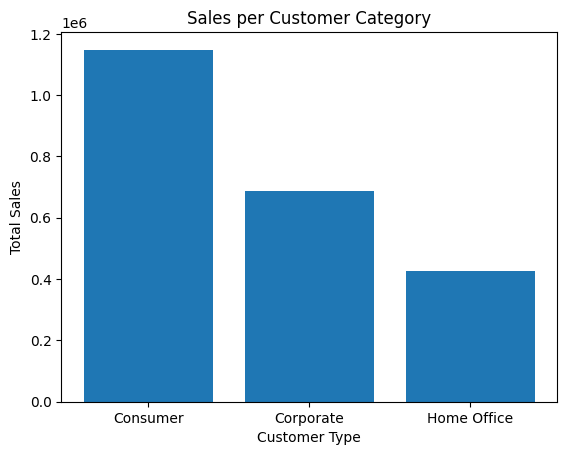

In [14]:
plt.bar(sales_per_category['Customer Type'],sales_per_category['Total Sales'])
plt.title('Sales per Customer Category')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()

In [15]:
customer_order_freq=df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()
customer_order_freq.rename(columns={'Order ID':'Total Orders'},inplace=True)
customer_order_freq

,Customer ID,Customer Name,Segment,Total Orders
0,AA-10315,Alex Avila,Consumer,11
1,AA-10375,Allen Armold,Consumer,15
2,AA-10480,Andrew Allen,Consumer,12
3,AA-10645,Anna Andreadi,Consumer,18
4,AB-10015,Aaron Bergman,Consumer,6
...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,28
789,YC-21895,Yoseph Carroll,Corporate,8
790,YS-21880,Yana Sorensen,Corporate,12
791,ZC-21910,Zuschuss Carroll,Consumer,31


In [16]:
customer_order_freq[customer_order_freq['Total Orders']>1].shape[0]

787

In [17]:
customer_order_freq[customer_order_freq['Total Orders']>1].sort_values(by='Total Orders',ascending=False).head(10).reset_index(drop=True)

,Customer ID,Customer Name,Segment,Total Orders
0,WB-21850,William Brown,Consumer,35
1,PP-18955,Paul Prost,Home Office,34
2,MA-17560,Matt Abelman,Home Office,34
3,JL-15835,John Lee,Consumer,33
4,SV-20365,Seth Vernon,Consumer,32
5,JD-15895,Jonathan Doherty,Corporate,32
6,CK-12205,Chloris Kastensmidt,Consumer,32
7,AP-10915,Arthur Prichep,Consumer,31
8,EP-13915,Emily Phan,Consumer,31
9,ZC-21910,Zuschuss Carroll,Consumer,31


In [18]:
df.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(10).reset_index(drop=True)

,Customer ID,Customer Name,Segment,Sales
0,SM-20320,Sean Miller,Home Office,25043.050
1,TC-20980,Tamara Chand,Corporate,19052.218
2,RB-19360,Raymond Buch,Consumer,15117.339
3,TA-21385,Tom Ashbrook,Home Office,14595.620
4,AB-10105,Adrian Barton,Consumer,14473.571
5,KL-16645,Ken Lonsdale,Consumer,14175.229
6,SC-20095,Sanjit Chand,Consumer,14142.334
7,HL-15040,Hunter Lopez,Consumer,12873.298
8,SE-20110,Sanjit Engle,Consumer,12209.438
9,CC-12370,Christopher Conant,Consumer,12129.072


In [19]:
df[df['Segment']=='Consumer']['Region'].value_counts()

West       1638
East       1444
Central    1188
South       831
Name: Region, dtype: int64

## Insights 

1. Consumer segment has maximum number of customers.
2. Maximum sales was also done by the consumer segment.
3. William Brown has done the most orders but Sean Miller from Home Office has maximum sales.

# Analysis of Shipping Mode

In [20]:
#Analysis of Shipping Mode

In [21]:
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
6335,6336,CA-2015-133305,11/07/2015,15/07/2015,Standard Class,MH-17455,Mark Hamilton,Consumer,United States,New York City,New York,10011,East,OFF-BI-10002954,Office Supplies,Binders,Newell 3-Hole Punched Plastic Slotted Magazine...,18.280
365,366,CA-2015-123344,24/09/2015,29/09/2015,Standard Class,JD-16060,Julia Dunbar,Consumer,United States,San Francisco,California,94109,West,OFF-ST-10001713,Office Supplies,Storage,"Gould Plastics 9-Pocket Panel Bin, 18-3/8w x 5...",211.960
2026,2027,CA-2017-113516,08/09/2017,10/09/2017,Second Class,VM-21685,Valerie Mitchum,Home Office,United States,Lancaster,California,93534,West,OFF-BI-10002225,Office Supplies,Binders,"Square Ring Data Binders, Rigid 75 Pt. Covers,...",33.024
5985,5986,CA-2017-163776,19/07/2017,25/07/2017,Standard Class,JS-16030,Joy Smith,Consumer,United States,Hattiesburg,Mississippi,39401,South,OFF-BI-10003007,Office Supplies,Binders,"Premium Transparent Presentation Covers, No Pa...",77.560
1154,1155,CA-2015-136567,20/12/2015,21/12/2015,First Class,PS-19045,Penelope Sewall,Home Office,United States,Harrisonburg,Virginia,22801,South,OFF-ST-10004337,Office Supplies,Storage,"SAFCO Commercial Wire Shelving, 72h",122.480


In [22]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [23]:
c=df['Ship Mode'].value_counts().reset_index().rename(columns={'index': 'Shipment Mode','Ship Mode':'frequency'})
c

,Shipment Mode,frequency
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


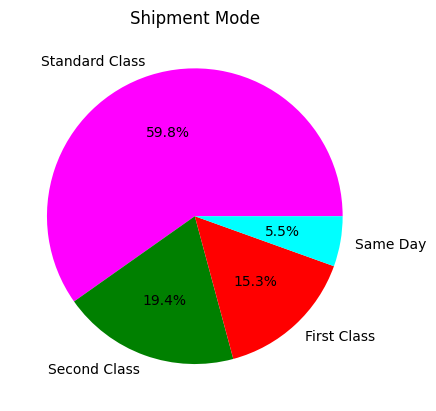

In [24]:
    plt.pie(c['frequency'], labels=c['Shipment Mode'],autopct='%1.1f%%',colors=['Magenta','Green','Red','Cyan'])
    plt.title('Shipment Mode')
    plt.show()

In [25]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
df['Time Diff']=df['Ship Date']-df['Order Date']

In [26]:
#Avegrage shipping time based on Shipment mode
df.groupby(['Ship Mode'])['Time Diff'].mean().reset_index().sort_values(by='Time Diff',ascending=False).reset_index(drop=True).rename(columns={'Time Diff':'Shipping Time'})

,Ship Mode,Shipping Time
0,Standard Class,5 days 00:12:02.580645161
1,Second Class,3 days 05:58:51.861198738
2,First Class,2 days 04:18:04.077281812
3,Same Day,0 days 01:04:14.275092936


In [27]:
#Avegrage shipping time based on Region
df.groupby(['Region'])['Time Diff'].mean().reset_index().sort_values(by='Time Diff',ascending=False).reset_index(drop=True).rename(columns={'Time Diff':'Shipping Time'})

,Region,Shipping Time
0,Central,4 days 01:34:51.699604743
1,South,3 days 23:04:07.809762202
2,West,3 days 22:19:34.012738853
3,East,3 days 21:50:44.165170556


In [28]:
grouped_data=df.groupby(['Segment'])['Ship Mode'].value_counts()
grouped_data

Segment      Ship Mode     
Consumer     Standard Class    3031
             Second Class      1003
             First Class        755
             Same Day           312
Corporate    Standard Class    1782
             Second Class       589
             First Class        468
             Same Day           114
Home Office  Standard Class    1046
             Second Class       310
             First Class        278
             Same Day           112
Name: Ship Mode, dtype: int64

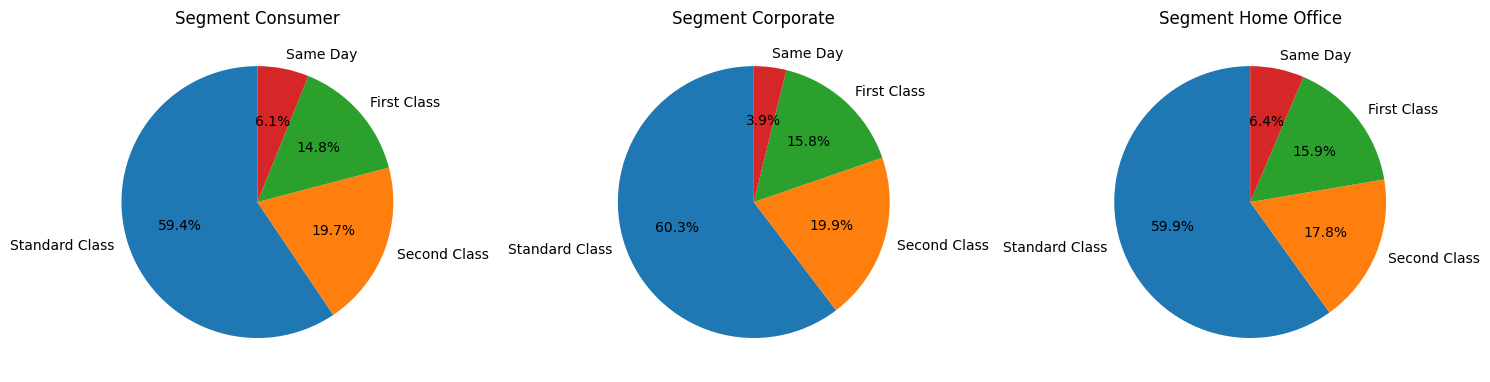

In [29]:

fig, axs = plt.subplots(1, len(grouped_data.index.levels[0]), figsize=(15, 5))

# Iterate through segments and create pie charts
for i, segment in enumerate(grouped_data.index.levels[0]):
    segment_data = grouped_data[segment]
    labels = segment_data.index
    sizes = segment_data.values
    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Segment {segment}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


<AxesSubplot: xlabel='Time Diff'>

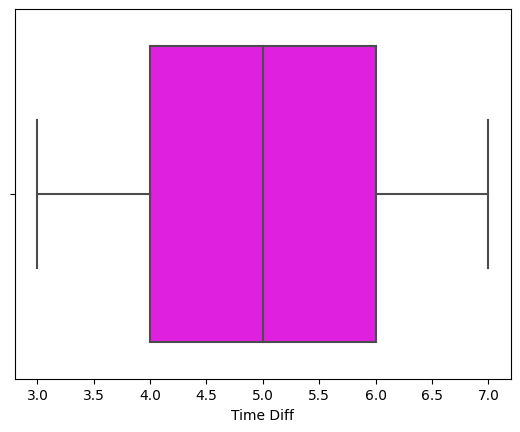

In [30]:
df['Weekday'] = df['Ship Date'].dt.day_name()
ab=df[df['Ship Mode']=='Standard Class']
sns.boxplot(x=ab['Time Diff'].dt.days,color='magenta')

In [31]:
# Shipping Day of Standard Class shipment
ab['Weekday'].value_counts()

Saturday     1028
Sunday        981
Thursday      915
Friday        852
Wednesday     814
Monday        652
Tuesday       617
Name: Weekday, dtype: int64

## Insights

1. There are four shipment modes. 
2. Standard class is the most perferd shipment mode by all segements.
3. Standard class has an average shipment time of 5 days. It varies from maximum of 7 days to minium of 3 days
4. Central region has a average shipment time of 4 days

# Analysis by Location

In [32]:
df['State'].value_counts().reset_index().rename(columns={'index': 'State','State':'Number of customer'}).head(10)

,State,Number of customer
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504
5,Illinois,483
6,Ohio,454
7,Florida,373
8,Michigan,253
9,North Carolina,247


In [33]:
df['State'].value_counts().mean()

200.0

In [34]:
df['State'].value_counts().reset_index().rename(columns={'index': 'State','State':'Number of customer'}).tail(3)

,State,Number of customer
46,North Dakota,7
47,West Virginia,4
48,Wyoming,1


In [35]:
df.groupby(['State'])['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(10).reset_index(drop=True)

,State,Sales
0,California,446306.4635
1,New York,306361.1470
2,Texas,168572.5322
3,Washington,135206.8500
4,Pennsylvania,116276.6500
5,Florida,88436.5320
6,Illinois,79236.5170
7,Michigan,76136.0740
8,Ohio,75130.3500
9,Virginia,70636.7200


In [36]:
state_city_sales = df.groupby(['State','City'])['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)

print(state_city_sales.head(20).reset_index(drop=True))

           State           City        Sales
0       New York  New York City  252462.5470
1     California    Los Angeles  173420.1810
2     Washington        Seattle  116106.3220
3     California  San Francisco  109041.1200
4   Pennsylvania   Philadelphia  108841.7490
5          Texas        Houston   63956.1428
6       Illinois        Chicago   47820.1330
7     California      San Diego   47521.0290
8       Michigan        Detroit   42446.9440
9        Florida   Jacksonville   39133.3280
10         Texas    San Antonio   21843.5280
11      Delaware         Newark   20319.9800
12         Texas         Dallas   20127.9482
13       Indiana      Lafayette   19624.5100
14       Georgia        Atlanta   17197.8400
15     Minnesota    Minneapolis   16870.5400
16      Virginia    Springfield   16628.5300
17  Rhode Island     Providence   15980.6500
18          Ohio       Columbus   15900.7930
19      Kentucky      Henderson   15661.0100


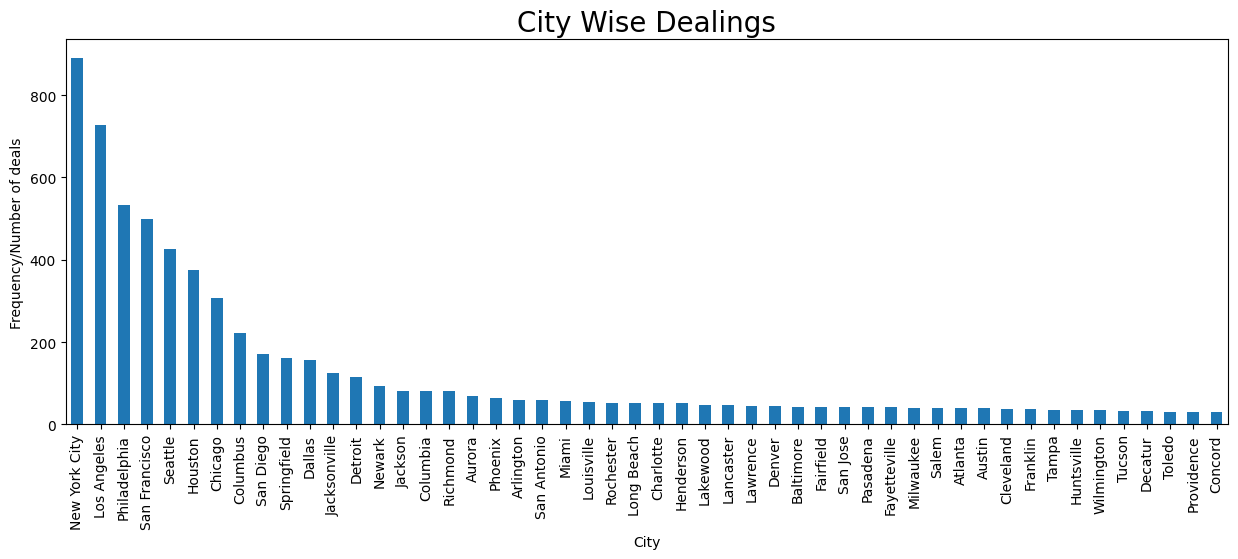

In [37]:
df2=df['City'].value_counts().head(50)
df2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency/Number of deals')
plt.xlabel('City')

plt.title('City Wise Dealings',fontsize=20)
plt.show()

In [58]:
df.groupby(['Region'])['Order ID'].count().sort_values(ascending=False)

Region
West       3140
East       2785
Central    2277
South      1598
Name: Order ID, dtype: int64

In [57]:
df.groupby(['Region'])['Sales'].sum().sort_values(ascending=False)

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

## Insights

1. California has most customers where as Wyoming has least customer
2. California has done the maximum sales followed by New York and Texas
3. Among the city New York City has done maximum sales
4. The South has least number of sales 

# Product Analysis 

In [39]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [40]:

df[df['Category']=='Office Supplies']['Sub-Category'].unique()

array(['Labels', 'Storage', 'Art', 'Binders', 'Appliances', 'Paper',
       'Envelopes', 'Fasteners', 'Supplies'], dtype=object)

In [41]:
df.groupby('Category')['Sub-Category'].nunique().reset_index().sort_values(by='Sub-Category',ascending=False)

,Category,Sub-Category
1,Office Supplies,9
0,Furniture,4
2,Technology,4


In [69]:
df.groupby(['Category'])['Order ID'].count().sort_values(ascending=False)


Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: Order ID, dtype: int64

In [42]:
d=df.groupby(['Category'])['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).reset_index(drop=True)
d

,Category,Sales
0,Technology,827455.8730
1,Furniture,728658.5757
2,Office Supplies,705422.3340


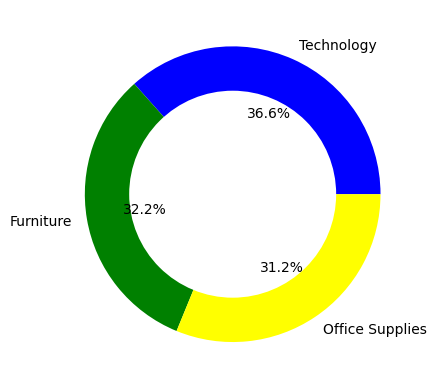

In [67]:
 plt.pie(d['Sales'], labels=d['Category'],autopct='%1.1f%%',colors=['Blue','Green','Yellow'])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

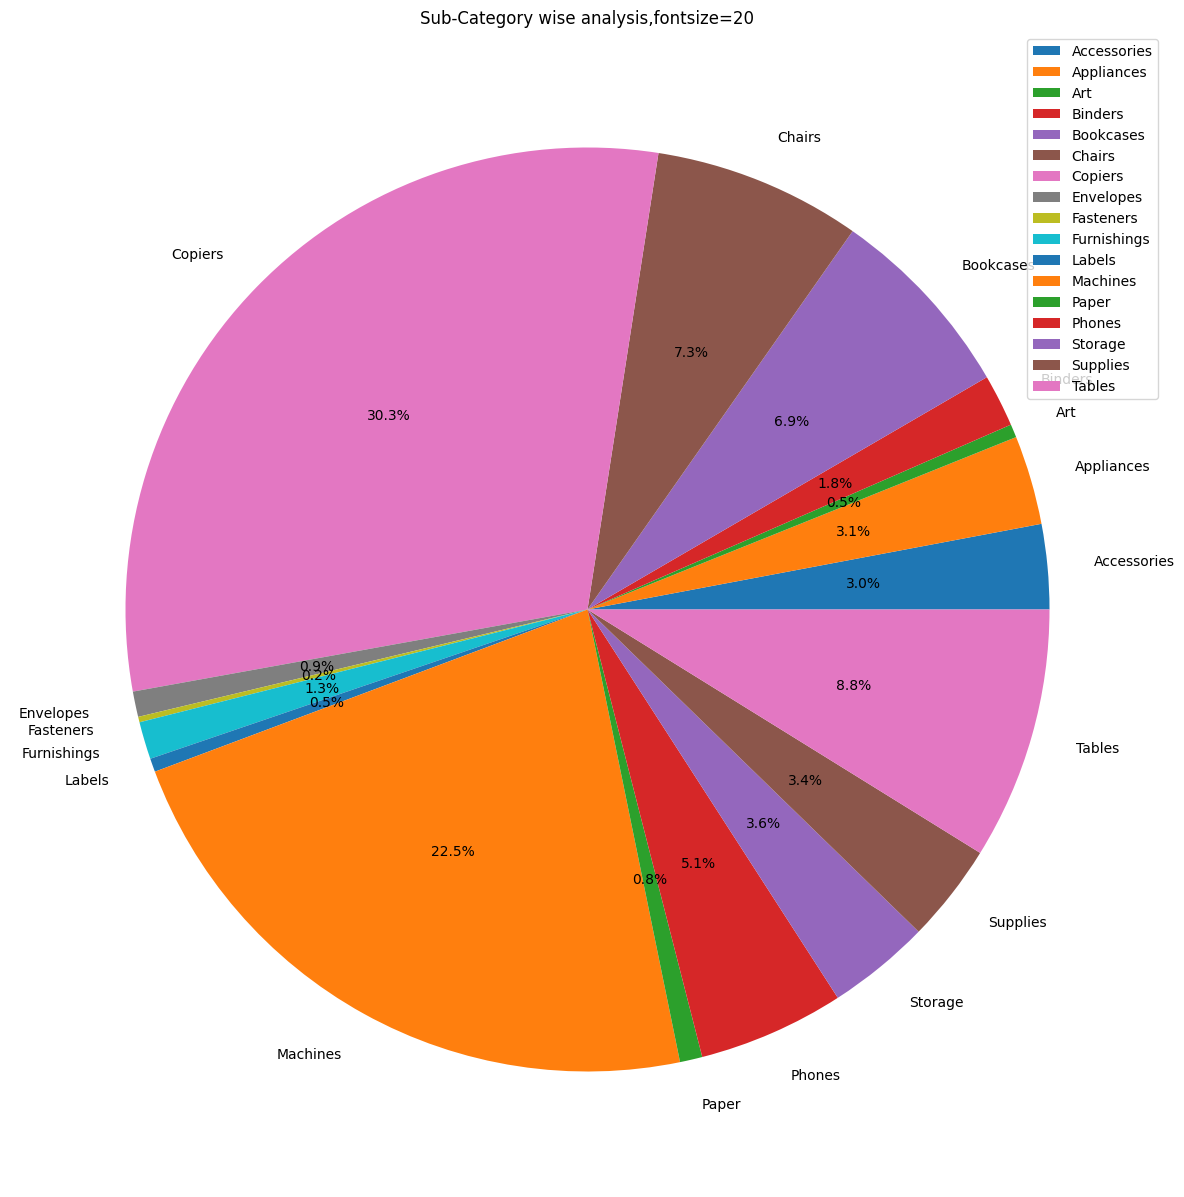

In [44]:
df_sub_category = df.groupby(['Sub-Category'])[['Sales']].mean()
plt.figure(figsize=(15,15))
plt.pie(df_sub_category['Sales'],labels=df_sub_category.index,autopct='%1.1f%%')
plt.title('Sub-Category wise analysis,fontsize=20')
plt.legend()
plt.xticks(rotation=90)
plt.show()

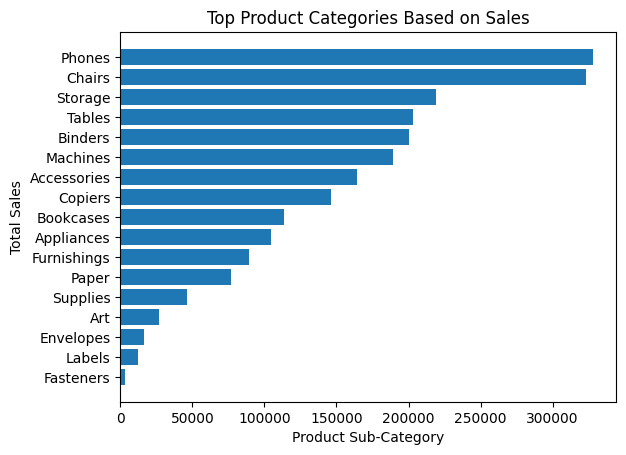

In [45]:
product_subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()
top_product_subcategory = product_subcategory.sort_values(by='Sales', ascending=True)
# Ploting a bar graph

plt.barh(top_product_subcategory['Sub-Category'], top_product_subcategory['Sales'])

# Labels
plt.title('Top Product Categories Based on Sales')
plt.xlabel('Product Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

plt.show()

In [63]:
t=df[df['Region']=='South']
t.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False)

Sub-Category
Phones         58098.338
Machines       53890.960
Chairs         44739.246
Tables         43830.212
Binders        36734.365
Storage        35251.100
Accessories    26906.154
Appliances     19525.326
Furnishings    17062.660
Paper          13891.576
Bookcases      10899.362
Copiers         9299.756
Supplies        8318.928
Art             4510.424
Envelopes       3345.556
Labels          2344.180
Fasteners        503.316
Name: Sales, dtype: float64

## Insights

1. Technology made the maximum sales.
2. Maximum order was placed in office supplies
3. Phones is the highest selling product

# Analysis By Year

In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by years and calculate the total sales amount for each year
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()

yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date': 'Year', 'Sales':'Total Sales'})

# yearly_sales = 
# Print the total sales for each year
print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


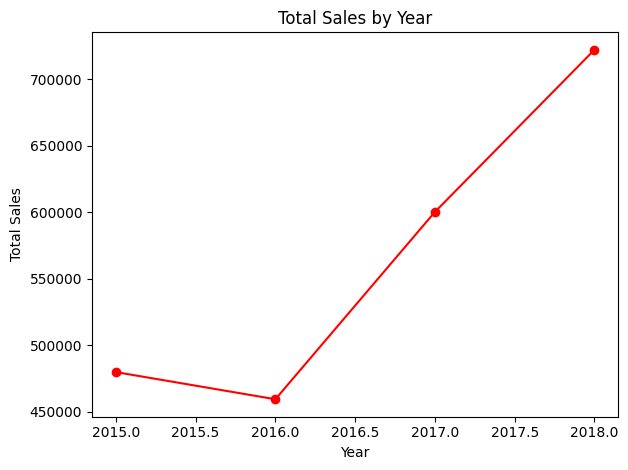

In [47]:
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='-',color='r')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.tight_layout()

plt.show()

In [48]:
year_sales = df[df['Order Date'].dt.year == 2018]
quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()

quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date': 'Quarter', 'Sales':'Total Sales'})


print("Quarterly Sales for 2018:")
print(quarterly_sales)

Quarterly Sales for 2018:
     Quarter  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


In [49]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Filter the data for the year 2018
year_sales = df[df['Order Date'].dt.year == 2018]

# Calculate the monthly sales for 2018
monthly_sales = year_sales.resample('M', on='Order Date')['Sales'].sum()

# Renaming the columns
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date':'Month', 'Sales':'Total Montly Sales'})

# Print the monthly and quarterly sales for 2018
print("Monthly Sales for 2018:")
print(monthly_sales)

Monthly Sales for 2018:
        Month  Total Montly Sales
0  2018-01-31          43476.4740
1  2018-02-28          19920.9974
2  2018-03-31          58863.4128
3  2018-04-30          35541.9101
4  2018-05-31          43825.9822
5  2018-06-30          48190.7277
6  2018-07-31          44825.1040
7  2018-08-31          62837.8480
8  2018-09-30          86152.8880
9  2018-10-31          77448.1312
10 2018-11-30         117938.1550
11 2018-12-31          83030.3888


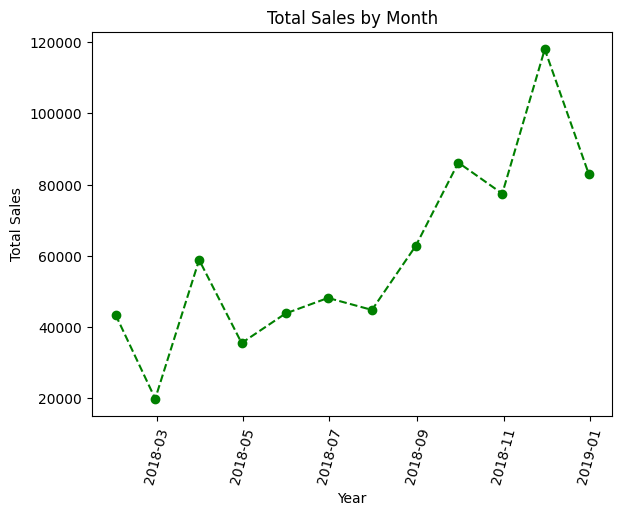

In [50]:
plt.plot(monthly_sales['Month'], monthly_sales['Total Montly Sales'], marker='o', linestyle='--',color='g')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=75)

plt.show()

# Sales Trend

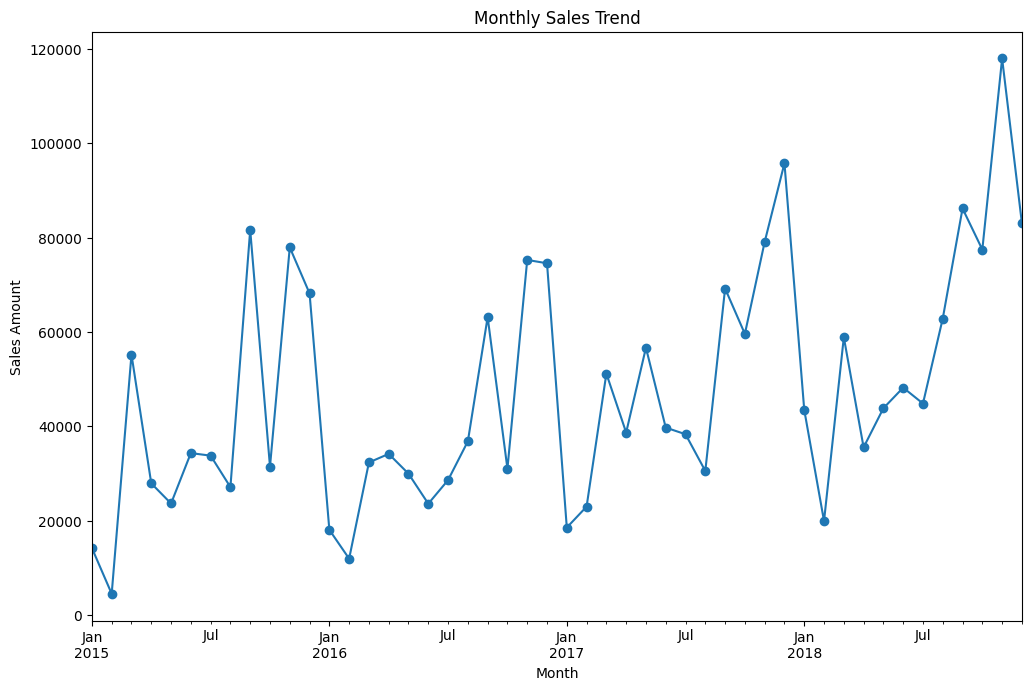

In [51]:

monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Plot the sales trends for months
plt.figure(figsize=(12, 26))

# Monthly Sales Trend
plt.subplot(3, 1, 1)
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')

plt.show()

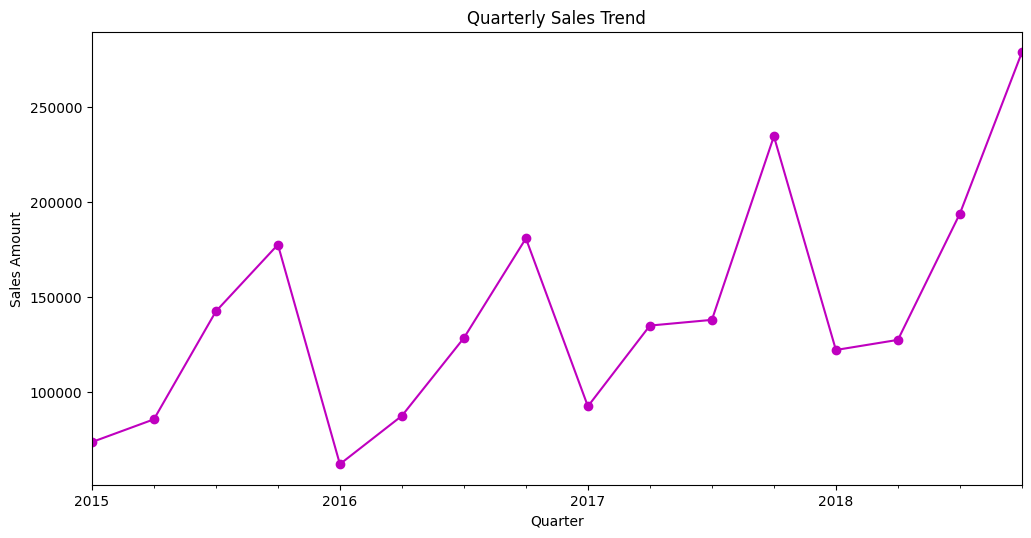

In [52]:
quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum()

# Plot the sales trends for months, quarters, and years
plt.figure(figsize=(12, 20))

# Quarterly Sales Trend
plt.subplot(3, 1, 2)
quarterly_sales.plot(kind='line', marker='o',color='m')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Sales Amount')

plt.show()


In [53]:
#most sold subcategory of 2018
sales_2018=df[df['Order Date'].dt.year == 2018]
sales_2018.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).reset_index(drop=True)

,Sub-Category,Sales
0,Phones,104685.6580
1,Chairs,93191.2730
2,Binders,71721.2550
3,Storage,68072.7020
4,Copiers,62899.3880
5,Tables,60893.5425
6,Accessories,58240.9700
7,Machines,43544.6750
8,Appliances,40212.7220
9,Bookcases,30024.2797


In [54]:
f=sales_2018.groupby(sales_2018['Order Date'].dt.month).agg({'Sales': ['sum'],'Order ID': ['count']}).rename({'index':'Month'})
f.columns=['Total Sales','Total Orders']
f

,Total Sales,Total Orders
Order Date,,
1,43476.4740,143
2,19920.9974,104
3,58863.4128,237
4,35541.9101,200
5,43825.9822,240
6,48190.7277,235
7,44825.1040,223
8,62837.8480,214
9,86152.8880,453


## Insights

1. Sales increase with year. 2018 has the maximum sales
2. Sales was mostly increase during the end of the year 

## Sales Forecasting


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)


# Calculate the monthly sales for 2018
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

# Renaming the columns
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date':'Month', 'Sales':'Total Montly Sales'})

monthly_sales

C:\Users\Tanmo\AppData\Local\Temp\ipykernel_34488\503307010.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


,Month,Total Montly Sales
0,2015-01-31,14205.7070
1,2015-02-28,4519.8920
2,2015-03-31,55205.7970
3,2015-04-30,27906.8550
4,2015-05-31,23644.3030
5,2015-06-30,34322.9356
6,2015-07-31,33781.5430
7,2015-08-31,27117.5365
8,2015-09-30,81623.5268
9,2015-10-31,31453.3930


In [9]:
monthly_sales.set_index('Month',inplace=True)

<Axes: xlabel='Month'>

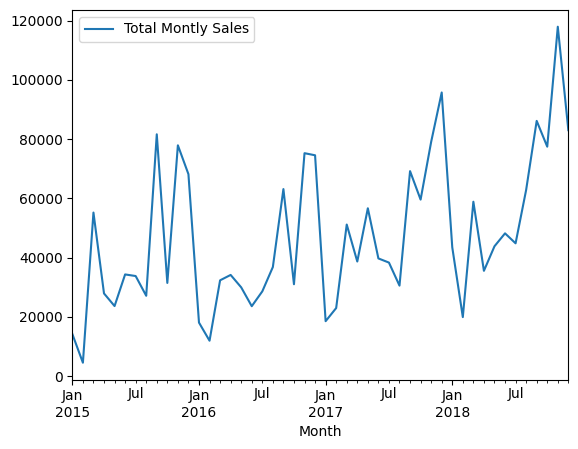

In [10]:
monthly_sales.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
test_result=adfuller(monthly_sales['Total Montly Sales'])

In [13]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [14]:
adfuller_test(monthly_sales['Total Montly Sales'])

ADF Test Statistic : -4.416136761430769
p-value : 0.00027791039276670623
#Lags Used : 0
Number of Observations Used : 47
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


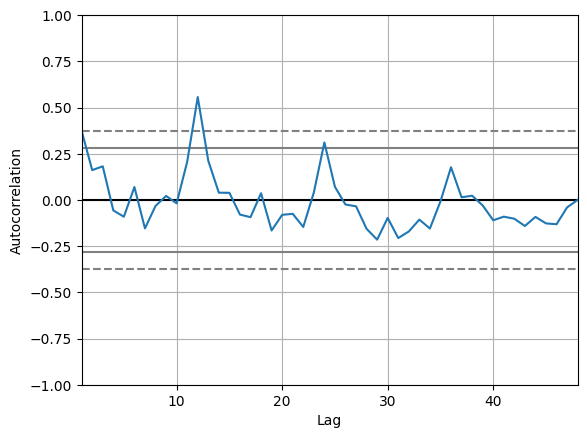

In [16]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(monthly_sales['Total Montly Sales'])
plt.show()

In [19]:
import statsmodels.api as sm

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

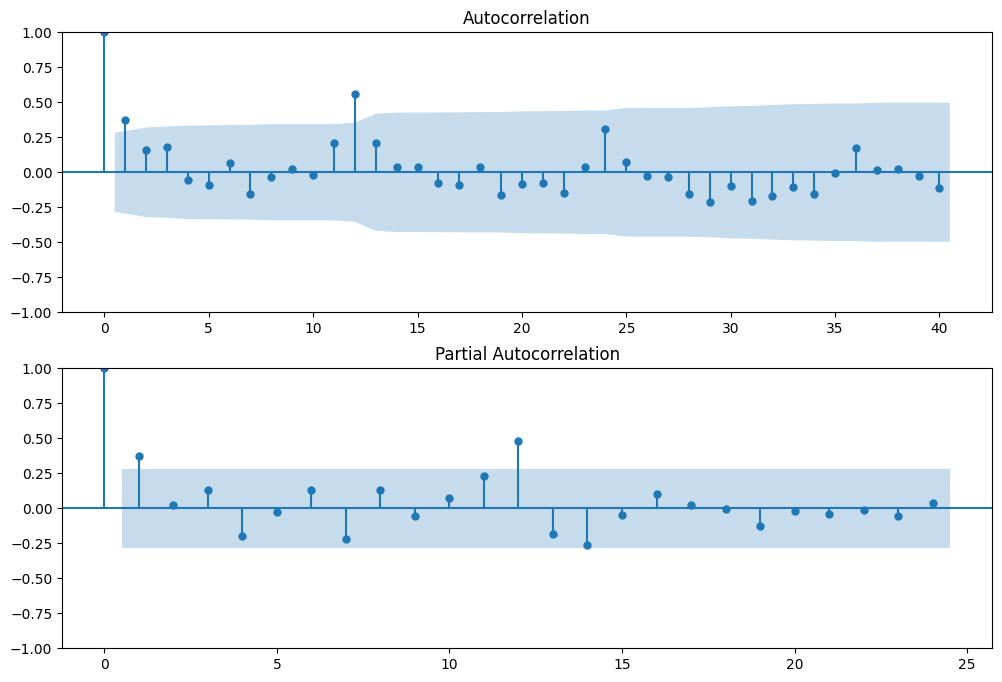

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(monthly_sales['Total Montly Sales'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(monthly_sales['Total Montly Sales'],lags=24,ax=ax2)

In [21]:
max_lags = len(monthly_sales['Total Montly Sales']) // 2

In [22]:
print(max_lags)

24


In [45]:
model=sm.tsa.statespace.SARIMAX(monthly_sales['Total Montly Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\python3.11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\python3.11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\python3.11\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<Axes: xlabel='Month'>

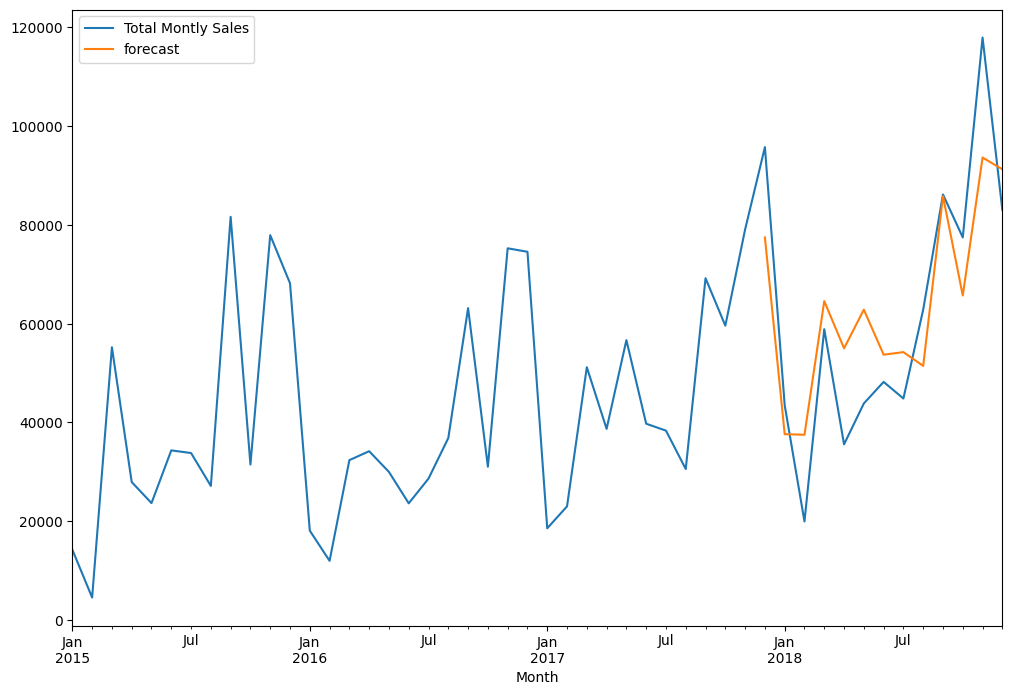

In [46]:
monthly_sales['forecast']=results.predict(start=35,end=47,dynamic=True)
monthly_sales[['Total Montly Sales','forecast']].plot(figsize=(12,8))

In [31]:
from pandas.tseries.offsets import DateOffset
future_dates=[monthly_sales.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [34]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=monthly_sales.columns)

In [35]:
future_datest_df.tail()

,Total Montly Sales,forecast
2020-07-31,NaN,NaN
2020-08-31,NaN,NaN
2020-09-30,NaN,NaN
2020-10-31,NaN,NaN
2020-11-30,NaN,NaN


In [36]:
future_df=pd.concat([monthly_sales,future_datest_df])

C:\Users\Tanmo\AppData\Local\Temp\ipykernel_34488\4231042732.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([monthly_sales,future_datest_df])


<Axes: >

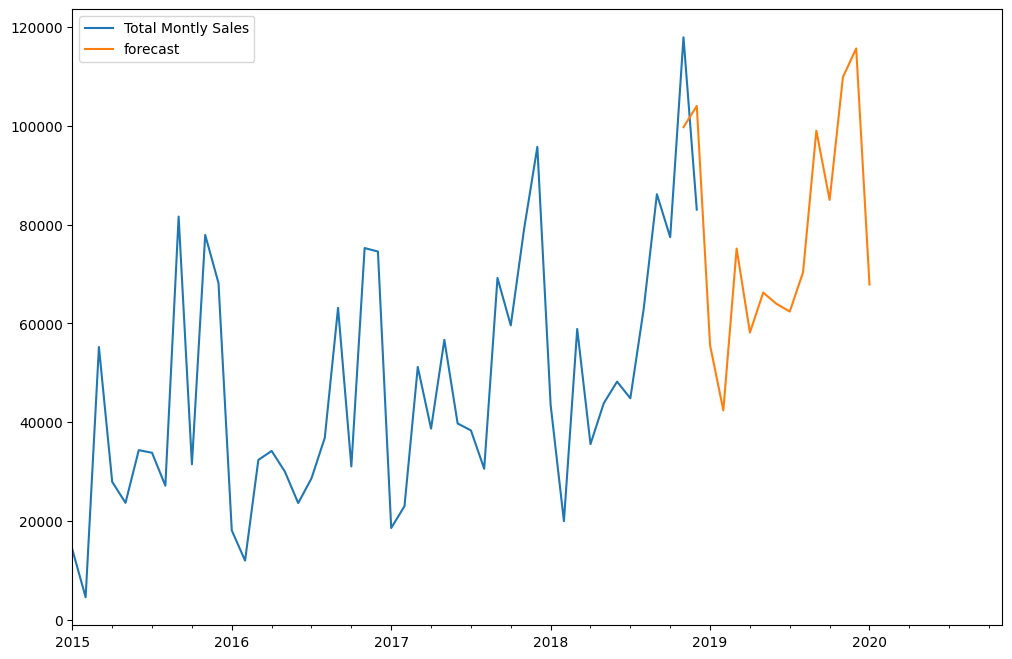

In [40]:
future_df['forecast'] = results.predict(start = 46, end = 60, dynamic= True)  
future_df[['Total Montly Sales', 'forecast']].plot(figsize=(12, 8)) 

# CONCLUSION


1. The most sucessful year was 2018. The sales trend shows that sales will increases with the comming years.
2. Sales was mostly increased at the year end.
3. Consumer segment mostly intresed in technology. But on 2018 office supplies has made the maximum sales in 2018.